In [28]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
TEST_DATA_PATH = "NormaliseDataforTest.csv"
HAS_HEADER = True

def load_csv_numeric(path, num_cols=None, has_header=True):
    rows = []
    with open(path, "r") as f:
        for line_idx, line in enumerate(f):
            line=line.strip()
            if not line:
                continue
            if has_header and line_idx==0:
                continue
            parts=line.split(",")
            if num_cols is not None and len(parts)!=num_cols:
                continue
            try:
                nums=[float(p) for p in parts]
            except ValueError:
                continue
            rows.append(nums)
    if not rows:
        raise ValueError(f"No valid data loaded from {path}")
    return np.array(rows,dtype=float)

test_data = load_csv_numeric(TEST_DATA_PATH,num_cols=None,has_header=HAS_HEADER)
print("Test data shape:", test_data.shape)

X_test = test_data[:, :2]
Y_test = test_data[:, 2:]

print("Example test input:", X_test[0])
print("Example test target:", Y_test[0])

Test data shape: (110038, 4)
Example test input: [0.50568776 0.5512126 ]
Example test target: [0.67799696 0.51902789]


In [ ]:
weights_input_hidden = [
[ 2.10050914, -5.50494811],
 [ 3.71669002, -1.580667],
 [ 2.14915179, -1.56640093],
 [-1.02762595, -0.46879742],
]

weights_hidden_output = [
             [ 1.31500456,  3.32735183, -4.55340553,  1.39037922],
            [-0.38735794, -0.26112676,  1.48243235, -0.26744983],
]

LAMBDA_VAL=0.8

In [ ]:
def sigmoid(v):
    v_clipped = np.clip(v,-100.0,100.0)
    return 1.0/(1.0+np.exp(-LAMBDA_VAL * v_clipped))

def layer_linear_forward(inputs, weights):
    inputs=np.asarray(inputs, dtype=float)
    out=[]
    for w_row in weights:
        w_row_arr=np.asarray(w_row, dtype=float)
        out.append(float(np.dot(inputs, w_row_arr)))
    return out

def feed_forward_single(x_vec):
    x_vec=np.asarray(x_vec, dtype=float)
    hidden_linear=layer_linear_forward(x_vec, weights_input_hidden)
    hidden_linear=np.asarray(hidden_linear, dtype=float)
    hidden_out=sigmoid(hidden_linear)
    y_pred=layer_linear_forward(hidden_out, weights_hidden_output)
    y_pred=np.asarray(y_pred, dtype=float)
    return hidden_out, y_pred

In [ ]:
predictions = []
for i in range(len(X_test)):
    _, y_pred=feed_forward_single(X_test[i])
    predictions.append(y_pred)
predictions=np.vstack(predictions)
errors=predictions-Y_test
rmse_y1=np.sqrt(np.mean(errors[:, 0]**2))
rmse_y2=np.sqrt(np.mean(errors[:, 1]**2))
rmse_overall=(rmse_y1+rmse_y2)/2.0

print(f"Test RMSE y1: {rmse_y1:.6f}")
print(f"Test RMSE y2: {rmse_y2:.6f}")
print(f"Test RMSE overall: {rmse_overall:.6f}")

Test RMSE y1: 0.144899
Test RMSE y2: 0.110080
Test RMSE overall: 0.127490


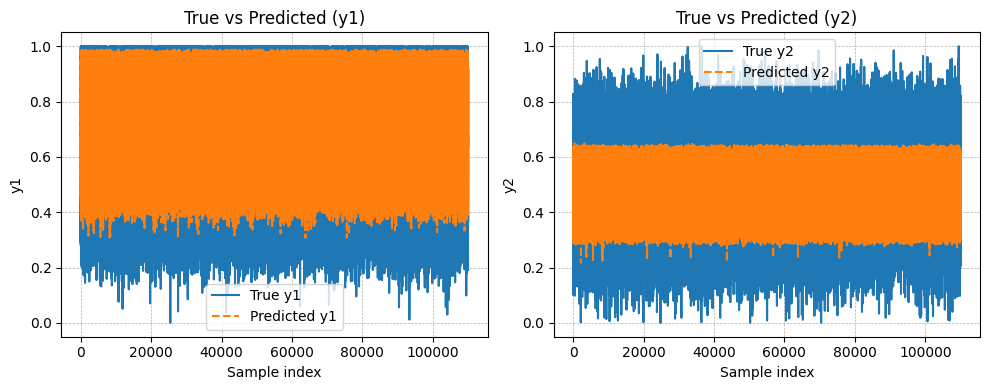

In [ ]:
indices = np.arange(1, len(X_test) + 1)
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(indices, Y_test[:, 0], label="True y1")
plt.plot(indices, predictions[:, 0], label="Predicted y1", linestyle="--")
plt.title("True vs Predicted (y1)")
plt.xlabel("Sample index")
plt.ylabel("y1")
plt.grid(True, linestyle="--", linewidth=0.5)
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(indices, Y_test[:, 1], label="True y2")
plt.plot(indices, predictions[:, 1], label="Predicted y2", linestyle="--")
plt.title("True vs Predicted (y2)")
plt.xlabel("Sample index")
plt.ylabel("y2")
plt.grid(True, linestyle="--", linewidth=0.5)
plt.legend()

plt.tight_layout()
plt.show()